# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Cleaned_LoanData.csv')
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,...,Channel_C,Channel_R,Channel_T,DelinquencyCategory_0,DelinquencyCategory_1,DelinquencyCategory_2,RepaymentCategory_0,RepaymentCategory_1,RepaymentCategory_2,DelinquencyFlag
0,584,1999-04-01,0.0,2029-03-01,0,1,71,21,116000,71,...,0,0,1,0,0,1,1,0,0,0
1,584,1999-05-01,0.0,2029-04-01,0,1,79,28,96000,79,...,0,1,0,0,1,0,1,0,0,1
2,584,1999-05-01,0.0,2029-04-01,0,1,66,18,101000,66,...,0,1,0,0,0,1,0,1,0,0
3,584,1999-03-01,0.0,2029-02-01,0,1,65,25,66000,65,...,0,1,0,0,0,1,0,1,1,0
4,584,1999-03-01,0.0,2029-02-01,0,1,80,38,234000,80,...,0,0,1,0,0,1,0,1,0,0


In [3]:
df.shape

(290262, 42)

In [4]:
#Check for missing values in each feature
df.isnull().sum()

CreditScore                   0
FirstPaymentDate              0
FirstTimeHomebuyer            0
MaturityDate                  0
MIP                           0
Units                         0
OCLTV                         0
DTI                           0
OrigUPB                       0
LTV                           0
OrigInterestRate              0
PropertyState                 0
OrigLoanTerm                  0
NumBorrowers                  0
ServicerName                  0
EverDelinquent                0
MonthsDelinquent              0
MonthsInRepayment             0
ComputedLoanTerm              0
CreditScoreCategory           0
DTICategory                   0
LoanRiskCategory              0
LoanPurpose_P                 0
LoanPurpose_R                 0
Occupancy_INV                 0
Occupancy_PR                  0
Occupancy_SH                  0
PropertyType_Condo            0
PropertyType_Multi-Family     0
PropertyType_Other            0
PropertyType_Single-Family    0
Channel_

# scaling, normalization, and feature selection techniques

In [5]:

from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, PowerTransformer,
    QuantileTransformer, RobustScaler, MaxAbsScaler
)
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2


X = df.drop(columns=['DelinquencyFlag','FirstPaymentDate','MaturityDate'])
y = df['DelinquencyFlag']

features = ["CreditScore", "OrigUPB", "DTI", "LTV", "OCLTV"]
X = df[features]

# ====================
# 🔹 1. Min-Max Scaling
# ====================
minmax_scaled = MinMaxScaler().fit_transform(X)
minmax_df = pd.DataFrame(minmax_scaled, columns=[f"{col}_minmax" for col in features])

# ============================
# 🔹 2. Z-score Standardization
# ============================
zscore_scaled = StandardScaler().fit_transform(X)
zscore_df = pd.DataFrame(zscore_scaled, columns=[f"{col}_zscore" for col in features])

# =========================
# 🔹 3. Log Transformation
# =========================
# Apply log1p to avoid log(0) and negatives
log_df = np.log1p(X)
log_df.columns = [f"{col}_log" for col in features]

# ===================================
# 🔹 4. Quantile Transformation (normal)
# ===================================
quantile_scaled = QuantileTransformer(output_distribution='normal', random_state=0).fit_transform(X)
quantile_df = pd.DataFrame(quantile_scaled, columns=[f"{col}_quantile" for col in features])

# ==========================
# 🔹 5. Robust Scaling
# ==========================
robust_scaled = RobustScaler().fit_transform(X)
robust_df = pd.DataFrame(robust_scaled, columns=[f"{col}_robust" for col in features])

# ==========================
# 🔹 6. Max-Abs Scaling
# ==========================
maxabs_scaled = MaxAbsScaler().fit_transform(X)
maxabs_df = pd.DataFrame(maxabs_scaled, columns=[f"{col}_maxabs" for col in features])

# ====================================
# 🔹 7. PCA (Principal Component Analysis)
# ====================================
# Normalize before PCA
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# =========================================
# 🔹 8. Feature Selection - SelectKBest + chi2
# =========================================
# For chi2, features must be non-negative
X_nonneg = MinMaxScaler().fit_transform(X)  # ensure all values >= 0

selector = SelectKBest(score_func=chi2, k=3)
X_kbest = selector.fit_transform(X_nonneg, y)
kbest_columns = np.array(features)[selector.get_support()]
kbest_df = pd.DataFrame(X_kbest, columns=[f"{col}_kbest" for col in kbest_columns])

# =====================
# 🔹 Combine All Results
# =====================
final_df = pd.concat([
    df,
    minmax_df,
    zscore_df,
    log_df,
    quantile_df,
    robust_df,
    maxabs_df,
    pca_df,
    kbest_df
], axis=1)

final_df.head()


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,...,CreditScore_maxabs,OrigUPB_maxabs,DTI_maxabs,LTV_maxabs,OCLTV_maxabs,PCA1,PCA2,CreditScore_kbest,OrigUPB_kbest,DTI_kbest
0,584,1999-04-01,0.0,2029-03-01,0,1,71,21,116000,71,...,0.73,0.483333,0.355932,0.689320,0.645455,0.109691,0.448619,0.0,0.395122,0.355932
1,584,1999-05-01,0.0,2029-04-01,0,1,79,28,96000,79,...,0.73,0.400000,0.474576,0.766990,0.718182,0.841261,0.521573,0.0,0.297561,0.474576
2,584,1999-05-01,0.0,2029-04-01,0,1,66,18,101000,66,...,0.73,0.420833,0.305085,0.640777,0.600000,-0.398982,0.313267,0.0,0.321951,0.305085
3,584,1999-03-01,0.0,2029-02-01,0,1,65,25,66000,65,...,0.73,0.275000,0.423729,0.631068,0.590909,-0.481168,0.553772,0.0,0.151220,0.423729
4,584,1999-03-01,0.0,2029-02-01,0,1,80,38,234000,80,...,0.73,0.975000,0.644068,0.776699,0.727273,1.409259,1.990604,0.0,0.970732,0.644068


# Baseline Logistic Regression

In [6]:

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select standardized features
feature_cols = ['CreditScore_zscore', 'OrigUPB_zscore', 'DTI_zscore', 'LTV_zscore', 'OCLTV_zscore']
X = final_df[feature_cols]
y = final_df['DelinquencyFlag']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# Build and train the baseline Logistic Regression model
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.6531617659724734

Confusion Matrix:
 [[30752 16030]
 [ 4105  7166]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.66      0.75     46782
           1       0.31      0.64      0.42     11271

    accuracy                           0.65     58053
   macro avg       0.60      0.65      0.58     58053
weighted avg       0.77      0.65      0.69     58053



In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


# Define logistic regression and grid parameters
log_reg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # supports l1 and l2
}

# ROC-AUC-based GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',   #  Use ROC-AUC scoring here
    n_jobs=-1
)

grid_search.fit(X, y)

# Best model and results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation ROC-AUC:", grid_search.best_score_)

# Evaluate ROC-AUC on the training data (or use test data if available)
y_pred_proba = grid_search.best_estimator_.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_pred_proba)
print("ROC-AUC on full data:", roc_auc)


Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation ROC-AUC: 0.844971674879489
ROC-AUC on full data: 0.6953485400621034


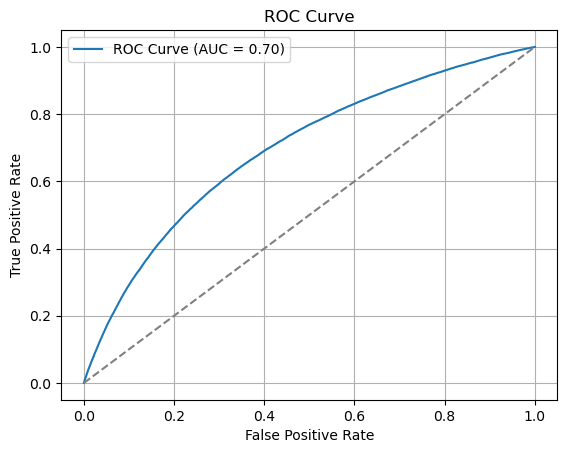

In [8]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()